# Tema 29: Pruebas T 2

En esta libreta veremos otro método para realizar una comparación de dos medias.

Te sugiero que revises esta [libreta](https://bambinos.github.io/bambi/notebooks/t-test.html) de la documentación de bambi para la explicación del modelo.

In [1]:
import bambi as bmb
import arviz as az
import pingouin as pg

data = pg.read_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


In [2]:
clean_data = data[data['species'] != 'Gentoo'] 
model = bmb.Model(
    'body_mass_g ~ species', clean_data, dropna=True
)
model

Automatically removing 1/220 rows from the dataset.


       Formula: body_mass_g ~ species
        Family: gaussian
          Link: mu = identity
  Observations: 219
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 3710.7306, sigma: 1310.4353)
            species ~ Normal(mu: 0.0, sigma: 2351.7068)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 435.2532)

In [5]:
result = model.fit()

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.14        3            188.26 draws/s   0:00:10   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.93        3            209.98 draws/s   0:00:09   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.03        1            256.28 draws/s   0:00:07   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.93        3            510.60 draws/s   0:00:03   0:00:00

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


Con esto bambi ajustó los datos al modelo y corrió la cadenas markov para muestrear la distribución posterior. Es importante ver que las cadenas parecen no haber encontrado divergencias, lo cual es excelente.
Hagamos diagnóstico de las cadenas, debemos analizar si convergieron adecuadamente. El análisis puede realizarse con `arviz`.

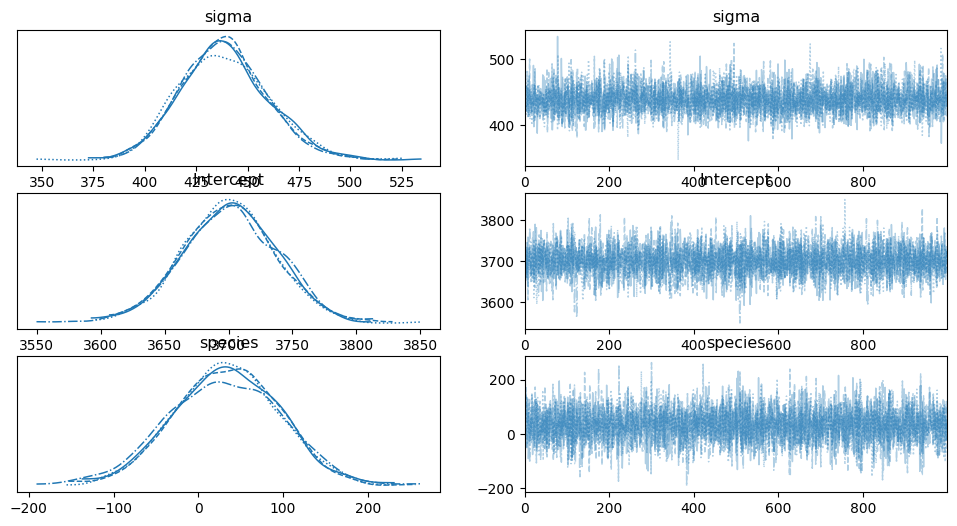

In [9]:
az.plot_trace(result,);

Podemos ver que las cadenas parecen haber convergido ya que las trazas tienen forma de "ruido". Ahora podemos analizar los resultados.

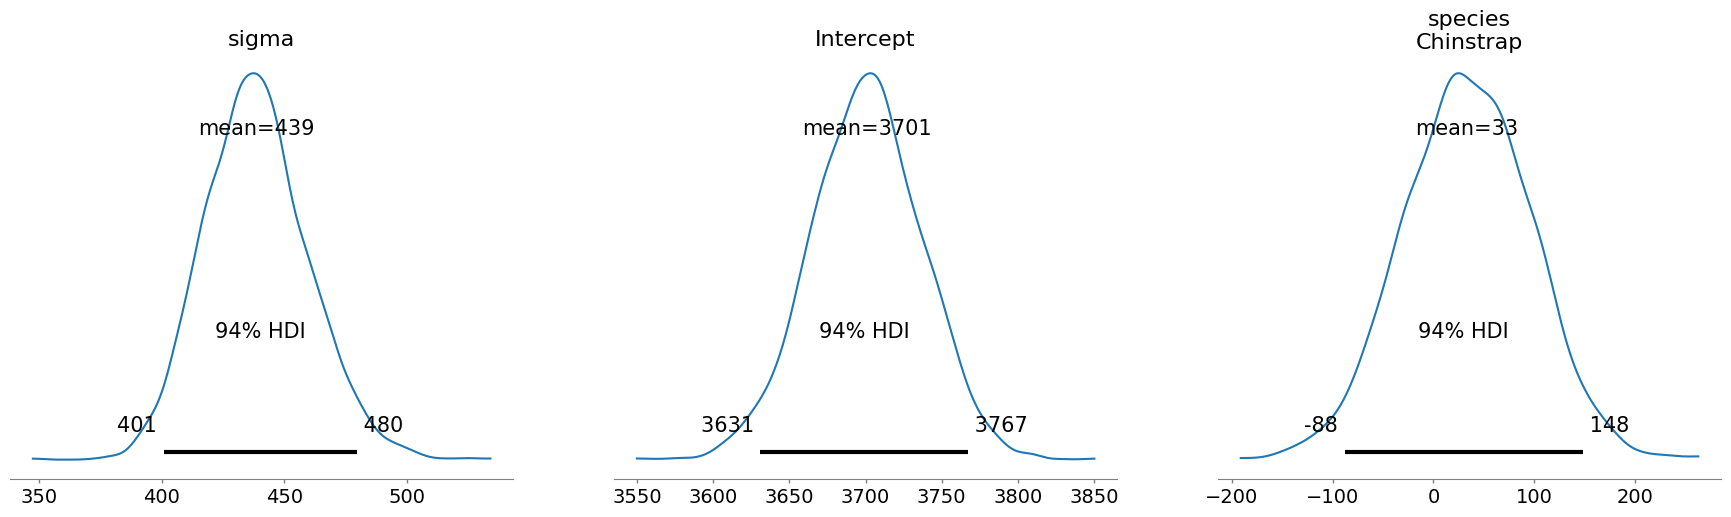

In [11]:
az.plot_posterior(result);

Esto grafica las posteriores, pero en realidad solo nos interesa el grupo de especie.

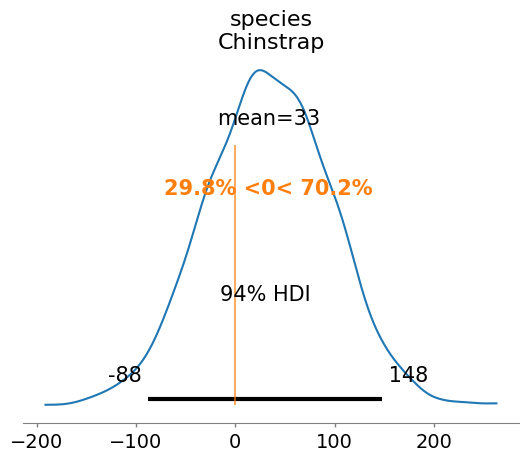

In [14]:
az.plot_posterior(result, var_names="species", ref_val=0);

Podemos ver que efectivamente no parece haber diferencia, ya que el intervalo de credibilidad cruza el cero. Veamoslo en forma de tabla.

In [6]:
az.summary(result)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,438.697,21.203,400.862,479.822,0.289,0.329,5384.0,2804.0,1.0
Intercept,3700.708,36.349,3630.994,3767.187,0.500,0.580,5333.0,3040.0,1.0
species[Chinstrap],33.467,63.391,-87.993,147.955,0.890,0.990,5088.0,2969.0,1.0


Sigma es la diferencia entre las especies, el intercepto es la media de peso para la especie de referencia (Adelie). Bambi tomó el primer valor como el de referencia, es posible especificar el grupo de referencia pero lo veremos en otra lección, en este caso ambos grupos son adecuados. `species[Chinstrap]` es la diferencia en el valor del peso para esta especie. Podemos ver que el intervalo creible  es -87 - 148 por lo que podemos rechazar la significancia de la diferencia, pero podemos obtener la probabilidad posterior de que los grupos sean diferentes.

En la tabla también podemos ver el valor $\hat{R}=1$ en todos los casos, lo que es importante para la confiabilidad de los resultados.

## Ejercicio
1. Ejecuta este método para comparación de medias con tus propios datos.